### importing routines

In [1]:
%matplotlib inline
%run importing_routines.ipynb
from __future__ import print_function, division, absolute_import

In [2]:
mpl.rcParams.update(rcParams)

&nbsp;
# Planck surface and KD regions in phase-space

/scratch/Projects/PynflationPrj/pynflation-public/pynflation/plancksurface.py:26: RuntimeWarning: invalid value encountered in sqrt
  dphi = np.sqrt(dphi2)
/scratch/Projects/PynflationPrj/pynflation-public/pynflation/plancksurface.py:51: RuntimeWarning: invalid value encountered in less
  where=self.dphi_KD < self.dphi, color=cKD, alpha=alpha)
/scratch/Projects/PynflationPrj/pynflation-public/pynflation/plancksurface.py:54: RuntimeWarning: invalid value encountered in less
  where=self.dphi_KD < self.dphi, color=cKD, alpha=alpha)
/scratch/Projects/PynflationPrj/pynflation-public/pynflation/potential.py:137: RuntimeWarning: divide by zero encountered in log
  phi2 = - np.sqrt(3. / 2.) * MP * np.log(1. - np.sqrt(Vphi) / self.lam2)
/scratch/Projects/PynflationPrj/pynflation-public/pynflation/potential.py:137: RuntimeWarning: invalid value encountered in log
  phi2 = - np.sqrt(3. / 2.) * MP * np.log(1. - np.sqrt(Vphi) / self.lam2)
/scratch/Projects/PynflationPrj/pynflation-public/pynflatio

<Figure size 230.4x144 with 0 Axes>

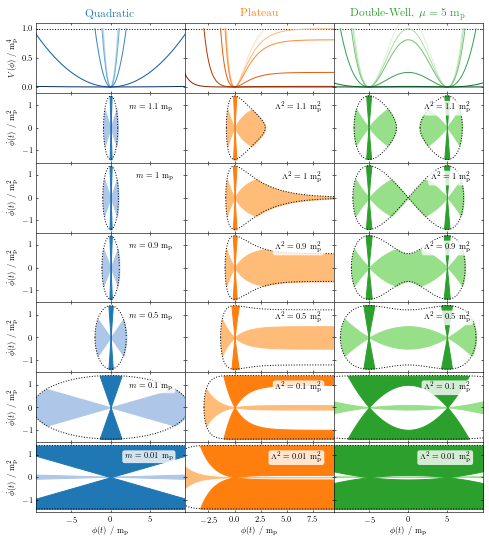

In [3]:
fig = plt.figure()
fw = fig.get_figwidth()
fh = fig.get_figheight()

fig, ax = plt.subplots(nrows=7, ncols=3, sharex='col', sharey='row', figsize=(8, 9))
fig.subplots_adjust(hspace=0., wspace=0.)

ax[0, 0].set_title("Quadratic"                         , color=cKD_m2phi2)
ax[0, 1].set_title("Plateau"                           , color=cKD_starob)
ax[0, 2].set_title("Double-Well,  $\mu=5~\mathrm{m_p}$", color=cKD_dbwell)

ax[0, 0].set_ylabel("$V(\phi)~/~\mathrm{m_p^4}$")
ax[0, 0].set_ylim(-0.1, 1.1)
ax[0, 0].axhline(MP**4, ls=':', c='k')
ax[0, 1].axhline(MP**4, ls=':', c='k')
ax[0, 2].axhline(MP**4, ls=':', c='k')

lams = [0.01, 0.1, 0.5, 0.9, 1.0, 1.1]
for i, lam2 in enumerate(lams[::-1]):
    PS_m2phi2 = PlanckSurface(['m2phi2', lam2],      num=500)
    PS_starob = PlanckSurface(['starobinsky', lam2], num=500)
    PS_dbwell = PlanckSurface(['hilltop', lam2, 5], num=1000)
    plt.sca(ax[0, 0]), plt.plot(PS_m2phi2.phi, PS_m2phi2.V(PS_m2phi2.phi), c=mpl.cm.Blues((i+1.) / len(lams)))
    plt.sca(ax[0, 1]), plt.plot(PS_starob.phi, PS_starob.V(PS_starob.phi), c=mpl.cm.Oranges((i+1.) / len(lams)))
    plt.sca(ax[0, 2]), plt.plot(PS_dbwell.phi, PS_dbwell.V(PS_dbwell.phi), c=mpl.cm.Greens((i+1.) / len(lams)))
    plt.sca(ax[i+1, 0]), PS_m2phi2.plot_phase_space(cSR=cSR_m2phi2, cKD=cKD_m2phi2)
    plt.sca(ax[i+1, 1]), PS_starob.plot_phase_space(cSR=cSR_starob, cKD=cKD_starob)
    plt.sca(ax[i+1, 2]), PS_dbwell.plot_phase_space(cSR=cSR_dbwell, cKD=cKD_dbwell)
    ax[i+1, 0].text(0.92, 0.85, "$m = %g ~\mathrm{m_p}$"           % lam2, ha='right', va='top', transform=ax[i+1, 0].transAxes, fontsize='medium', bbox=dict(lw=0, fc='w', alpha=0.8, boxstyle='round'))
    ax[i+1, 1].text(0.92, 0.85, "$\Lambda^2 = %g ~\mathrm{m_p^2}$" % lam2, ha='right', va='top', transform=ax[i+1, 1].transAxes, fontsize='medium', bbox=dict(lw=0, fc='w', alpha=0.8, boxstyle='round'))
    ax[i+1, 2].text(0.92, 0.85, "$\Lambda^2 = %g ~\mathrm{m_p^2}$" % lam2, ha='right', va='top', transform=ax[i+1, 2].transAxes, fontsize='medium', bbox=dict(lw=0, fc='w', alpha=0.8, boxstyle='round'))

phi_max = 9.5
for row, axi in enumerate(ax):
    for col, axij in enumerate(axi):
        if col > 0:
            axij.set_ylabel("")
        if row < 6:
            axij.set_xlabel("")
        if col == 1:
            axij.set_xlim(-phi_max/2, phi_max)
        else:
            axij.set_xlim(-phi_max, phi_max)

# if saving:
fig.savefig("figures/phasespace_planck_surface.pdf", bbox_inches='tight');
fig.savefig("figures/phasespace_planck_surface.png", bbox_inches='tight');